# Prédiction de la nature du trafic: Contributi ensemble learning

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import tree
# Ensemble Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
#from sklearn import cross_validation
from sklearn.model_selection import KFold, cross_val_score
import sklearn.model_selection as ms
from sklearn import metrics

from matplotlib import pyplot as plt
%matplotlib inline

## Load Data  for Classification

In [2]:
databases = pd.read_csv("csic_databases.csv")
databases.shape

(61065, 4)

# NETTOYAGE DES DONNEES


vérifions si nous avons des erreurs de type

Vérifions si nous avons des données manquantes:

In [3]:
databases.isnull().sum()

Type                  0
classification    43088
URL               43088
Link                  0
dtype: int64

Conclusion: Nous remarquons que de la variable:
            1-Accept -charset contient 397 valeurs manquantes
            2- Lenght contient 43088 valeurs manquantes
            3- classification contient 43088 valeurs manquantes
            4- URL contient 43088 valeurs manquantes

Traitement des valeurs manquantes

In [4]:
databases= databases.dropna()
databases.shape

(17977, 4)

Verification si le traitement des valeurs manquantes sont effectives

In [5]:
databases.isnull().sum()

Type              0
classification    0
URL               0
Link              0
dtype: int64

Conclusion :Plus de valeurs manquantes.

vérifions si nous avons des erreurs de types 

In [6]:
databases.dtypes

Type              object
classification    object
URL               object
Link              object
dtype: object

Conclusion:Il  y a des erreurs  de type

In [7]:
databases.Type.unique()

array(['Normal', 'Anomalous'], dtype=object)

In [8]:
databases.classification.unique().size

382

In [9]:
databases.classification.unique()

array(['Content-Length: 68', 'Content-Length: 63', 'Content-Length: 4',
       'Content-Length: 33', 'Content-Length: 43', 'Content-Length: 232',
       'Content-Length: 17', 'Content-Length: 234', 'Content-Length: 72',
       'Content-Length: 66', 'Content-Length: 42', 'Content-Length: 231',
       'Content-Length: 241', 'Content-Length: 71', 'Content-Length: 59',
       'Content-Length: 240', 'Content-Length: 276', 'Content-Length: 67',
       'Content-Length: 38', 'Content-Length: 267', 'Content-Length: 268',
       'Content-Length: 74', 'Content-Length: 62', 'Content-Length: 37',
       'Content-Length: 242', 'Content-Length: 266', 'Content-Length: 64',
       'Content-Length: 248', 'Content-Length: 239',
       'Content-Length: 271', 'Content-Length: 253',
       'Content-Length: 251', 'Content-Length: 60', 'Content-Length: 246',
       'Content-Length: 237', 'Content-Length: 262',
       'Content-Length: 243', 'Content-Length: 65', 'Content-Length: 259',
       'Content-Length: 2

In [10]:
databases.URL.unique().size

12091

In [11]:
databases.URL.unique()

array(['id=3&nombre=Vino+Rioja&precio=100&cantidad=55&B1=A%F1adir+al+carrito',
       'modo=entrar&login=choong&pwd=d1se3ci%F3n&remember=off&B1=Entrar',
       'id=2', ...,
       'modo=registro&login=beaumont&password=quEratItiS&nombre=Odilia&apellidos=Stumptner&email=henried%40cbgerindote.asia&dni=66631393W&direccion=C%2F+Xoana+Nogueira%2C+25+5%3FC&ciudad=Barrios%2C+Los&cp=46135&provincia=%C1vilaany%253F%250D%250ASet-cookie%253A%2BTamper%253D1041264011025374727&ntc=2498947451884473&B1=Registrar',
       'modo=registro&login=%2Bmel%2Fhem&password=quEratItiS&nombre=Odilia&apellidos=Stumptner&email=henried%40cbgerindote.asia&dni=66631393W&direccion=C%2F+Xoana+Nogueira%2C+25+5%3FC&ciudad=Barrios%2C+Los&cp=46135&provincia=%C1vila&ntc=2498947451884473&B1=Registrar',
       'modo=registro&login=beaumont&password=quEratItiS&nombre=Odilia&apellidos=Stumptner&email=henried%40cbgerindote.asia&dniA=66631393W&direccion=C%2F+Xoana+Nogueira%2C+25+5%3FC&ciudad=Barrios%2C+Los&cp=46135&provincia=%C1vi

In [12]:
databases.Link.unique().size

8

In [13]:
databases.Link.unique()

array(['http://localhost:8080/tienda1/publico/anadir.jsp HTTP/1.1',
       'http://localhost:8080/tienda1/publico/autenticar.jsp HTTP/1.1',
       'http://localhost:8080/tienda1/publico/caracteristicas.jsp HTTP/1.1',
       'http://localhost:8080/tienda1/publico/entrar.jsp HTTP/1.1',
       'http://localhost:8080/tienda1/publico/pagar.jsp HTTP/1.1',
       'http://localhost:8080/tienda1/publico/registro.jsp HTTP/1.1',
       'http://localhost:8080/tienda1/publico/vaciar.jsp HTTP/1.1',
       'http://localhost:8080/tienda1/miembros/editar.jsp HTTP/1.1'],
      dtype=object)

In [14]:
databases.head()

,Type,classification,URL,Link
2,Normal,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,http://localhost:8080/tienda1/publico/anadir.j...
4,Normal,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,http://localhost:8080/tienda1/publico/autentic...
6,Normal,Content-Length: 4,id=2,http://localhost:8080/tienda1/publico/caracter...
9,Normal,Content-Length: 33,errorMsg=Credenciales+incorrectas,http://localhost:8080/tienda1/publico/entrar.j...
12,Normal,Content-Length: 43,modo=insertar&precio=2672&B1=Pasar+por+caja,http://localhost:8080/tienda1/publico/pagar.js...


In [15]:
names = ['Type','classification','URL','Link']

In [16]:
databases["Type"].replace(["Normal", "Anomalous"], [1, 0], inplace=True)
databases["Type"].head()
databases["classification"]= databases["classification"].astype("category").cat.codes
databases["URL"]= databases["URL"].astype("category").cat.codes
databases["Link"]= databases["Link"].astype("category").cat.codes

In [17]:
databases.head()

,Type,classification,URL,Link
2,1,333,2190,1
4,1,324,3137,2
6,1,263,946,3
9,1,215,110,4
12,1,279,5412,5


(-0.5, 2.5)

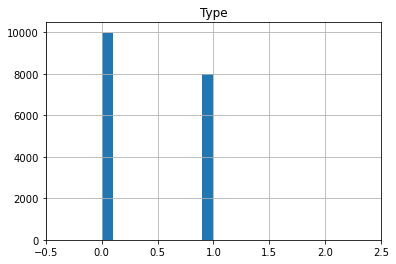

In [18]:
databases['Type'].value_counts()
#class distribution
databases.hist(column='Type')
plt.xlim(-0.5,2.5)

In [19]:
databases.dtypes

Type              int64
classification    int16
URL               int16
Link               int8
dtype: object

In [20]:
databases.isnull().sum()

Type              0
classification    0
URL               0
Link              0
dtype: int64

In [21]:
databases.loc[databases[['Type','classification','URL','Link']].duplicated(keep=False),:]

,Type,classification,URL,Link
6,1,263,946,3
9,1,215,110,4
17,1,71,29,7
42,1,263,226,3
45,1,215,110,4
...,...,...,...,...
61031,0,18,147,4
61033,0,20,106,4
61035,0,226,163,4
61047,0,98,34,7


In [22]:
databases.drop_duplicates()

,Type,classification,URL,Link
2,1,333,2190,1
4,1,324,3137,2
6,1,263,946,3
9,1,215,110,4
12,1,279,5412,5
...,...,...,...,...
61045,0,142,8918,6
61055,0,135,7477,0
61057,0,205,7478,0
61059,0,139,7132,0


In [23]:
databases.shape

(17977, 4)

In [24]:
y = databases['Type']
X = databases.drop(['Type'], axis=1)

## CrossValidation Strategy - Model selection

In [25]:
CV_generator = KFold(n_splits=10, shuffle=True).split(X,y)
#nb folds of cross validation
for (train_idx, test_idx) in CV_generator:
    print("train_size:",len(train_idx),"some-train-indexes:", train_idx[:10]) 
    print("train_size:",len(test_idx), "some-test-indexes:", test_idx[:10]) 
    input()

train_size: 16179 some-train-indexes: [ 0  3  4  5  6  7  8  9 10 11]
train_size: 1798 some-test-indexes: [ 1  2 18 41 53 56 64 65 79 90]

train_size: 16179 some-train-indexes: [0 1 2 3 4 5 6 7 8 9]
train_size: 1798 some-test-indexes: [14 20 23 30 38 43 54 61 84 99]

train_size: 16179 some-train-indexes: [ 0  1  2  3  5  6  7  9 10 11]
train_size: 1798 some-test-indexes: [  4   8  26  32  34  44  52  78 103 106]

train_size: 16179 some-train-indexes: [0 1 2 3 4 5 6 7 8 9]
train_size: 1798 some-test-indexes: [ 10  17  29  40  42  55  72  73  89 104]


train_size: 16179 some-train-indexes: [0 1 2 3 4 5 6 7 8 9]
train_size: 1798 some-test-indexes: [ 22  35  37  57  66  69  82  91 113 126]

train_size: 16179 some-train-indexes: [ 1  2  3  4  6  7  8  9 10 11]
train_size: 1798 some-test-indexes: [ 0  5 15 19 27 39 62 68 86 95]
train_size: 16179 some-train-indexes: [ 0  1  2  3  4  5  6  7  8 10]
train_size: 1798 some-test-indexes: [  9  11  13  25  49 105 109 116 127 133]

train_size: 16180

In [26]:







kfold=10









##### 1- Decision Tree

In [27]:
#CV_generator = KFold(n_splits=10, shuffle=True).split(X,y)
dtc = tree.DecisionTreeClassifier(max_depth=50) # default max_depth=?    
scores = []
for idx_train, idx_test in KFold(n_splits=10, shuffle=True).split(X,y):
    X_train, X_test = X.iloc[idx_train], X.iloc[idx_test]
    y_train, y_test = y.iloc[idx_train], y.iloc[idx_test]
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    acc_score = metrics.accuracy_score(y_test, y_pred)
    scores.append(acc_score)
    
    
print("CrossVal rounds scores:", scores)
print(" Accuracy_decision_treeclassifier: %0.2f (+/- %0.2f)" % (np.mean(scores), np.std(scores) * 2))

CrossVal rounds scores: [0.8481646273637374, 0.839265850945495, 0.8337041156840934, 0.8314794215795328, 0.8648498331479422, 0.8298109010011123, 0.8553948832035595, 0.8425153032832499, 0.8402893711741792, 0.8425153032832499]
 Accuracy_decision_treeclassifier: 0.84 (+/- 0.02)


##### 4- KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn_cv, X, y, cv=10)

In [41]:
print(scores)
print("Accuracy_knn: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.81034483 0.81868743 0.79922136 0.80533927 0.80923248 0.80589544
 0.79532814 0.80912632 0.79744018 0.79298831]
Accuracy_knn: 0.80 (+/- 0.02)


##### 5- Logistic Regression

In [42]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(solver = 'liblinear')

In [43]:
scores = cross_val_score(lr, X, y, cv=kfold)
print("Accuracy_LogisticRegression: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy_LogisticRegression: 0.56 (+/- 0.01)


### Performance evaluation

In [44]:
from sklearn import metrics

In [45]:
clf_map = {'DecisionTreeClassifier': dtc, 'KNearestNeigbhors': knn, 'LogisticRegression':lr }
clf_preds_map = {}
for cname, clf in clf_map.items():
    clf.fit(X_train, y_train)
    clf_preds_map[cname] = clf.predict(X_test)

##### Accuracy

In [46]:

for cname, _ in clf_map.items():
    print("=> {0} accuracy = [{1:.2f}]]".format(cname, metrics.accuracy_score(y_test,clf_preds_map[cname])))
    

=> DecisionTreeClassifier accuracy = [0.85]]
=> KNearestNeigbhors accuracy = [0.84]]
=> LogisticRegression accuracy = [0.57]]


In [47]:
for cname, _ in clf_map.items():
    print("=> {0} f1_score = [{1:.2f}]]".format(cname, metrics.accuracy_score(y_test,clf_preds_map[cname])))
    

=> DecisionTreeClassifier f1_score = [0.85]]
=> KNearestNeigbhors f1_score = [0.84]]
=> LogisticRegression f1_score = [0.57]]


In [48]:
from sklearn import metrics

In [49]:
clf_map = {'KNeighborsClassifier': knn ,'DecisionTreeClassifier': dtc ,'Logistic Regression':lr}
clf_preds_map = {}
for cname, clf in clf_map.items():
    clf.fit(X_train, y_train)
    clf_preds_map[cname] = clf.predict(X_test)

# THREE learning model

In [54]:
# example of evaluating a stacking ensemble for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# create the synthetic classification dataset
X, y = make_classification(random_state=1)
# configure the models to use in the ensemble
models = [('knn', KNeighborsClassifier()), ('tree', DecisionTreeClassifier())]
# configure the ensemble model
model = StackingClassifier(models, final_estimator=LogisticRegression(), cv=3)
# configure the resampling method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the ensemble on the dataset using the resampling method# report ensemble performance
#print('Mean f1_score: %.3f (%.3f)' % (mean(n_scores),std(n_scores)))
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report ensemble performance
print('Mean_accuracy %.3f (%.3f)' % (mean(n_scores),std(n_scores)))

Mean_accuracy 0.930 (0.086)


In [55]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# create the synthetic classification dataset
X, y = make_classification(random_state=1)
# configure the models to use in the ensemble
models = [('knn', KNeighborsClassifier()), ('tree', DecisionTreeClassifier())]
# configure the ensemble model
model = StackingClassifier(models, final_estimator=LogisticRegression(), cv=3)
# configure the resampling method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the ensemble on the dataset using the resampling method# report ensemble performance
#print('Mean f1_score: %.3f (%.3f)' % (mean(n_scores),std(n_scores)))
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report ensemble performance
print('Mean f1_score: %.3f (%.3f)' % (mean(n_scores),std(n_scores)))

Mean f1_score: 0.927 (0.085)
